<a href="https://colab.research.google.com/github/kilianBertholon/Apprentissage-profond/blob/main/Partie3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Rendu Projet Apprentissage Profond </center>

In [1]:
!git clone https://github.com/kilianBertholon/Apprentissage-profond.git

Cloning into 'Apprentissage-profond'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 50 (delta 6), reused 7 (delta 1), pack-reused 32
Receiving objects: 100% (50/50), 106.29 MiB | 24.78 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Updating files: 100% (30/30), done.


Kilian Bertholon  
Guillaume Cobat  
Placé Anthony

In [40]:
import csv
import os
import json
import numpy as np

def load_data(nom_dossier="."):
    """
    Fonction de chargement des données
    Attention : Utilise les librairies csv et json. S'assurer que le répertoire de travail est celui où se trouve
    la fonction data_loading.py (sans déplacer les différents fichiers)
    """

    info_obs = {}
    users = []

    print("-- chargement des fichiers csv (observations + labels) --")
    dataset = []
    user_ids = []
    labels = []
    for dir_files in os.listdir(nom_dossier):
        if os.path.isfile(nom_dossier + "/" + dir_files) and dir_files[-3:]=='csv':
            user_id = dir_files.split('_')[0]
            print("Data ", user_id)
            users.append(user_id)
            cur_series = []
            cur_labels = []
            with open(nom_dossier + "/" + dir_files, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='\'')
                for i,row in enumerate(spamreader):
                    if i==0:
                        info_obs['observations'] = row[2:5]
                        info_obs['labels'] = row[7]
                    else:
                        cur_series.append([float(v) for v in row[2:5]])
                        cur_labels.append(row[7])
            segmented_series = []
            segmented_labels = []
            cur_lab = "not_labeled"
            cur_ser = []
            for i, (v, l) in enumerate(zip(cur_series, cur_labels)):
                if l != cur_lab:
                    if cur_lab != "not_labeled":
                        segmented_series.append(np.array(cur_ser))
                        segmented_labels.append(cur_lab)
                    cur_ser = []
                    cur_lab = l
                if l != "not_labeled":
                    cur_ser.append(v)
        dataset.extend(segmented_series)
        labels.extend(segmented_labels)
        user_ids.extend([user_id] * len(segmented_series))


    print("-- chargement du fichier json (meta données) --")
    # Opening JSON file
    f = open(os.path.join(nom_dossier, 'meta.json'))
    # returns JSON object as a dictionary
    tmp_meta_data = json.load(f)
    meta_data = {}
    for origin in tmp_meta_data:
        for user_id, user_info in tmp_meta_data[origin].items():
            meta_data[user_id] = user_info
            meta_data[user_id]['origin'] = origin
    # Closing file
    f.close()

    return dataset, labels, user_ids  # info_obs, meta_data

print("Lecture des données")
data_obs, data_labels, user_ids = load_data("Apprentissage-profond/hangtime_har/")
print("Données chargées")

print(data_obs[:5])
print(data_labels[:5])
print(user_ids[:5])

Lecture des données
-- chargement des fichiers csv (observations + labels) --
Data  b512
Data  4991
Data  4d70
Data  c6f3
Data  9bd4
Data  ce9d
Data  f2ad
Data  10f0
Data  2dd9
Data  ce9d
Data  ac59
Data  f2ad
Data  9bd4
Data  e90f
Data  4d70
Data  b512
Data  10f0
Data  0846
Data  a0da
Data  ac59
Data  a0da
Data  2dd9
Data  05d8
Data  0846
-- chargement du fichier json (meta données) --
Données chargées
[array([[-0.59497, -0.50952,  0.68579],
       [-0.56885, -0.51416,  0.67188],
       [-0.53784, -0.50488,  0.68774],
       ...,
       [ 0.90576, -1.27222,  1.09424],
       [ 0.64233, -2.0415 ,  2.09741],
       [ 1.06958, -2.59253,  1.89355]]), array([[ 1.72534 , -2.29004 ,  0.01855 ],
       [ 3.06958 , -0.95239 , -2.04224 ],
       [ 4.29956 , -0.24341 , -3.25122 ],
       [ 4.64771 , -2.18604 , -2.67261 ],
       [ 4.2373  , -6.09033 ,  1.81958 ],
       [ 5.62695 , -2.33081 ,  3.06079 ],
       [ 5.57202 ,  3.4751  ,  0.55103 ],
       [ 1.396   ,  3.16943 , -1.00342 ],
       [

## Création d'un jeu de données de test et d'un jeu d'entrainement

Dans un premier temps, on va se charger de séparer nos données en un jeu d'entrainement et un jeu de test. Pour ce faire, on va séparer chacun des tests de chacun des individus en gardant 80 % des tests de chacun des individus comme des données d'entrainements et 20 % restants comme des données de test

In [41]:
from sklearn.model_selection import train_test_split
import numpy as np

unique_users = list(set(user_ids))

data_obs_train = []
data_obs_test = []
data_labels_train = []
data_labels_test = []
user_ids_train = []
user_ids_test = []

#Pour chaque utilisateur, on sépare les données en train et test
for user in unique_users:
    #Extraire les indices correspondant à l'utilisateur
    indices_user = [i for i, u_id in enumerate(user_ids) if u_id == user]

    #Diviser les indices en train et test
    indices_train, indices_test = train_test_split(indices_user, test_size=0.1, random_state=42)

    #Ajouter les données d'entrainements
    data_obs_train.extend([data_obs[i] for i in indices_train])
    data_labels_train.extend([data_labels[i] for i in indices_train])
    user_ids_train.extend([user_ids[i] for i in indices_train])

    #Ajouter les données de test
    data_obs_test.extend([data_obs[i] for i in indices_test])
    data_labels_test.extend([data_labels[i] for i in indices_test])
    user_ids_test.extend([user_ids[i] for i in indices_test])



# Fonction pour ajouter du jitter à chaque valeur d'accélération
def add_jitter_to_data(data, factor=0.05):
    jitter = factor * np.random.normal(size=data.shape)
    return data + jitter




#-----------------------------SITTING--------------------------------------------------------------

# Utiliser une liste en compréhension pour obtenir les indices avec le label "sitting"
indices_sitting = [i for i, label in enumerate(data_labels_train) if label == "sitting"]

# Extraire les lignes associées au label "sitting" dans data_obs_train
data_obs_train_sitting = [data_obs_train[i] for i in indices_sitting]
data_labels_train_sitting = [data_labels_train[i] for i in indices_sitting]

# Créer un tableau pour stocker les données augmentées
augmented_data_sitting = []


# Appliquer la data augmentation jitter
for j in range(50): #Fais 10 fois un tour de boucle pour rajouter du random sur les 42 valeurs
  for i in range(len(data_obs_train_sitting)):
      augmented_data_sitting.append(add_jitter_to_data(data_obs_train_sitting[i]))

data_obs_train.extend(augmented_data_sitting)
#print(augmented_data_sitting)

label_a_ajouter = "sitting"

# Ajouter 420 occurrences du label "sitting" à la fin de la liste
data_labels_train.extend([label_a_ajouter] * len(augmented_data_sitting))

#-----------------------------SITTING--------------------------------------------------------------

#----------------------------STANDING--------------------------------------------------------------

# Utiliser une liste en compréhension pour obtenir les indices avec le label "standing"
indices_standing = [i for i, label in enumerate(data_labels_train) if label == "standing"]

# Extraire les lignes associées au label "sitting" dans data_obs_train
data_obs_train_standing = [data_obs_train[i] for i in indices_standing]
data_labels_train_standing = [data_labels_train[i] for i in indices_standing]

# Créer un tableau pour stocker les données augmentées
augmented_data_standing = []


# Appliquer la data augmentation jitter
for j in range(2): #Fais 10 fois un tour de boucle pour rajouter du random sur les 42 valeurs
  for i in range(len(data_obs_train_standing)):
      augmented_data_standing.append(add_jitter_to_data(data_obs_train_standing[i]))

data_obs_train.extend(augmented_data_standing)
#print(augmented_data_sitting)

label_a_ajouter_2 = "standing"

# Ajouter 420 occurrences du label "sitting" à la fin de la liste
data_labels_train.extend([label_a_ajouter_2] * len(augmented_data_standing))

#--------------------------------------------------------------------------------------------












# Utiliser un dictionnaire pour stocker le nombre d'occurrences de chaque label
occurrences = {}

# Compter le nombre d'occurrences pour chaque label
for label in data_labels_train:
    occurrences[label] = occurrences.get(label, 0) + 1

# Afficher le nombre d'occurrences pour chaque label
for label, count in occurrences.items():
    print(f"Label '{label}': {count} occurrence(s)")


Label 'standing': 2724 occurrence(s)
Label 'walking': 3585 occurrence(s)
Label 'running': 3522 occurrence(s)
Label 'jumping': 2152 occurrence(s)
Label 'sitting': 2805 occurrence(s)


Analyse du nombre de classes de y dans le jeu de test et dans le jeu d'apprentissage :

In [42]:
print('Il y a ', len(np.unique(data_labels_train)), ' classes dans les données d\'entraînement')
print('Il y a ', len(np.unique(data_labels_test)), ' classes dans les données de test')
print('Il y a ', len(np.unique(data_labels)), ' classes dans les données totales')

print('dif label en entrainement : ', np.unique(data_labels_train))
print('dif label en test : ',np.unique(data_labels_test))
print('dif label au total : ',np.unique(data_labels))

Il y a  5  classes dans les données d'entraînement
Il y a  5  classes dans les données de test
Il y a  5  classes dans les données totales
dif label en entrainement :  ['jumping' 'running' 'sitting' 'standing' 'walking']
dif label en test :  ['jumping' 'running' 'sitting' 'standing' 'walking']
dif label au total :  ['jumping' 'running' 'sitting' 'standing' 'walking']


Les labels sont bien les mêmes dans les jeux d'entrainements et de tests et correspondent bien à ceux du jeu de base

## Normalisation des données

In [43]:
#essai 2
from sklearn.preprocessing import StandardScaler

data_obs_train_concatenated = np.concatenate(data_obs_train)
data_obs_test_concatenated = np.concatenate(data_obs_test)

# Initialiser le scaler
scaler = StandardScaler()

# Adapter le scaler sur l'ensemble du jeu de données (entraînement + test)
scaler.fit(np.concatenate([data_obs_train_concatenated, data_obs_test_concatenated]))

# Appliquer la transformation sur toutes les séquences d'entraînement et de test
data_obs_train_Norm = [scaler.transform(obs) for obs in data_obs_train]
data_obs_test_Norm = [scaler.transform(obs) for obs in data_obs_test]

## Longueur de chaque série temporelle

Dans notre cas, il serait préférables d'avoir des séquences de tailles identiques ( plus simple pour la convergence des informations)  
On va donc chercher à rajouter du padding (séries de 0 pour complémenter le manque d elongueur sur certaines séquences) ou a réaliser du troncage (garder uniquement la partie la plus importante de chaque série pour obtenir des informations de même taille)

In [21]:
num_sequences = len(data_obs_train_Norm)

# Afficher la longueur de chaque séquence
for i in range(min(5,num_sequences)):
    print(f"Longueur de la séquence {i + 1}: {len(data_obs_train[i])}")

Longueur de la séquence 1: 200
Longueur de la séquence 2: 46
Longueur de la séquence 3: 53
Longueur de la séquence 4: 60
Longueur de la séquence 5: 106


#### Jeu de données d'entrainement

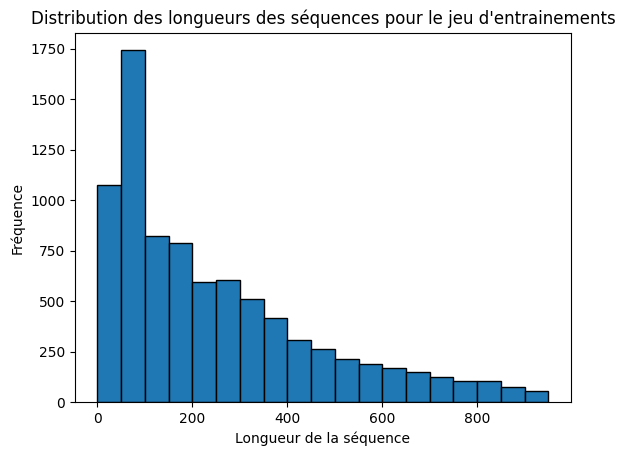

Longueur minimale : 1
Longueur maximale : 46004
Longueur moyenne : 485.6995495990333


In [ ]:
import matplotlib.pyplot as plt

# Calculer la longueur de chaque séquence
sequence_lengths = [len(seq) for seq in data_obs_train]

bins = np.arange(0, 1000, 50)
# Afficher un histogramme
plt.hist(sequence_lengths, bins=bins, edgecolor='black')
plt.title('Distribution des longueurs des séquences pour le jeu d\'entrainements')
plt.xlabel('Longueur de la séquence')
plt.ylabel('Fréquence')
plt.show()

min_length = min(sequence_lengths)
max_length = max(sequence_lengths)
mean_length = np.mean(sequence_lengths)

print(f"Longueur minimale : {min_length}")
print(f"Longueur maximale : {max_length}")
print(f"Longueur moyenne : {mean_length}")

#### Jeu de données de test

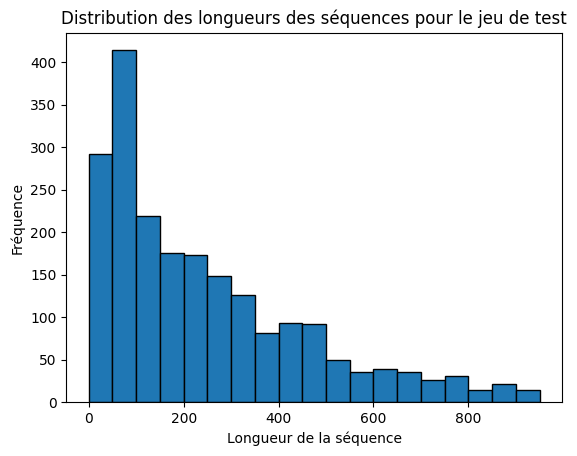

Longueur minimale : 2
Longueur maximale : 13930
Longueur moyenne : 448.20762155059134


In [ ]:
import matplotlib.pyplot as plt

# Calculer la longueur de chaque séquence
sequence_lengths = [len(seq) for seq in data_obs_test]

bins = np.arange(0, 1000, 50)
# Afficher un histogramme
plt.hist(sequence_lengths, bins=bins, edgecolor='black')
plt.title('Distribution des longueurs des séquences pour le jeu de test')
plt.xlabel('Longueur de la séquence')
plt.ylabel('Fréquence')
plt.show()

min_length = min(sequence_lengths)
max_length = max(sequence_lengths)
mean_length = np.mean(sequence_lengths)

print(f"Longueur minimale : {min_length}")
print(f"Longueur maximale : {max_length}")
print(f"Longueur moyenne : {mean_length}")

Pour être sur de ne pas se tromper on va créer les deux manières et on comparera pour chacun des test les deux manières de faire

## Padding

Test avec padding = 1000 (au dessus très peu d'actions sont plus longue et cela accentue nettemment le temps de traitement)

In [49]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

data_obs_train_Norm_pad = []
data_obs_train_Norm_pad = pad_sequences(data_obs_train_Norm, maxlen=600, padding='post', dtype='float32')

data_obs_test_Norm_pad = []
data_obs_test_Norm_pad = pad_sequences(data_obs_test_Norm, maxlen=600, padding='post', dtype='float32')


## Encodage des labels

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Encoder les labels en entiers
labels_encoder = LabelEncoder()
labels_train_int = labels_encoder.fit_transform(data_labels_train)
labels_test_int = labels_encoder.fit_transform(data_labels_test)

#Encoder les labels en one-hot
labels_onehot = OneHotEncoder(sparse=False, categories='auto')
labels_train_onehot = labels_onehot.fit_transform(labels_train_int.reshape(-1, 1))
labels_test_onehot = labels_onehot.fit_transform(labels_test_int.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Modèle à tester et comparer

##### Avec Padding  
  
1. RNN
2. CNN
3. CNN 1D

##### Sans Padding  
  
1. CNN avec GAP  
2. Réseau de neurones Transformer  
3. Réseaux de neurones Attention  
4. Réseaux de neurones Hybrides  


### Réseau RNN

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten, Input
from keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor='val_loss',patience=5, min_delta=0.01, restore_best_weights=True, verbose=2)


def model_rnn_basique(T, D, nb_classes):
  input = Input(shape = (T, D))
  Couche_rec = SimpleRNN(64)(input)
  dense1 = Dense(nb_classes, activation = "sigmoid")(Couche_rec)
  model = Model(inputs=input, outputs=dense1)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model


In [ ]:
model_rnn = model_rnn_basique(500, 3, 5)

data_obs_train_Norm_pad.shape

In [ ]:
history_rnn = model_rnn.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=500, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

### Réseau RNN avancé

In [ ]:
def model_rnn_avance(T, D, nb_classes):
  input = Input(shape = (T, D))
  Couche_rec = SimpleRNN(64, return_sequences=True)(input)
  Couche_rec2 = SimpleRNN(32)(Couche_rec)
  dense1 = Dense(nb_classes, activation = "sigmoid")(Couche_rec2)
  model = Model(inputs=input, outputs=dense1)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model



In [ ]:
model_rnn_avance = model_rnn_avance(500, 3, 5)
history_rnn_avance = model_rnn_avance.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=500, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

### Modèle LTSM

In [ ]:
# Definition du modèle
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, Flatten
def model_lstm(T, D, nb_classes):
  input = Input(shape = (T, D))
  Couche_rec = LSTM(64, return_sequences=True)(input)
  Couche_rec2 = LSTM(32)(Couche_rec)
  dense1 = Dense(nb_classes, activation = "sigmoid")(Couche_rec2)
  model = Model(inputs=input, outputs=dense1)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model

In [ ]:
model_lstm = model_lstm(500, 3, 5)
history_lstm = model_lstm.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=500, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 500, 3)]          0         
                                                                 
 lstm_7 (LSTM)               (None, 500, 64)           17408     
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 5)                 165       
                                                                 
Total params: 29989 (117.14 KB)
Trainable params: 29989 (117.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


KeyboardInterrupt: ignored

### LSTM Bidirectionnal


In [ ]:
# Definition du modèle
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, Flatten, Bidirectional
def model_lstm_bidi(T, D, nb_classes):
  input = Input(shape = (T, D))
  Couche_rec = Bidirectional(LSTM(128, return_sequences=True))(input)
  Couche_rec2 = Bidirectional(LSTM(128, return_sequences = True))(Couche_rec)
  Couche_rec3 = Bidirectional(LSTM(64, return_sequences = True))(Couche_rec2)
  Couche_rec4 = Bidirectional(LSTM(64, return_sequences = True))(Couche_rec3)
  Flatten1 = Flatten()(Couche_rec4)
  dense1 = Dense(32, activation = "relu")(Flatten1)
  dense2 = Dense(nb_classes, activation = "softmax")(dense1)
  model = Model(inputs=input, outputs=dense2)
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model

In [ ]:
model_lstm_bidi = model_lstm_bidi(500, 3, 5)
history_lstm_bidi = model_lstm_bidi.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=500, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

### CNN


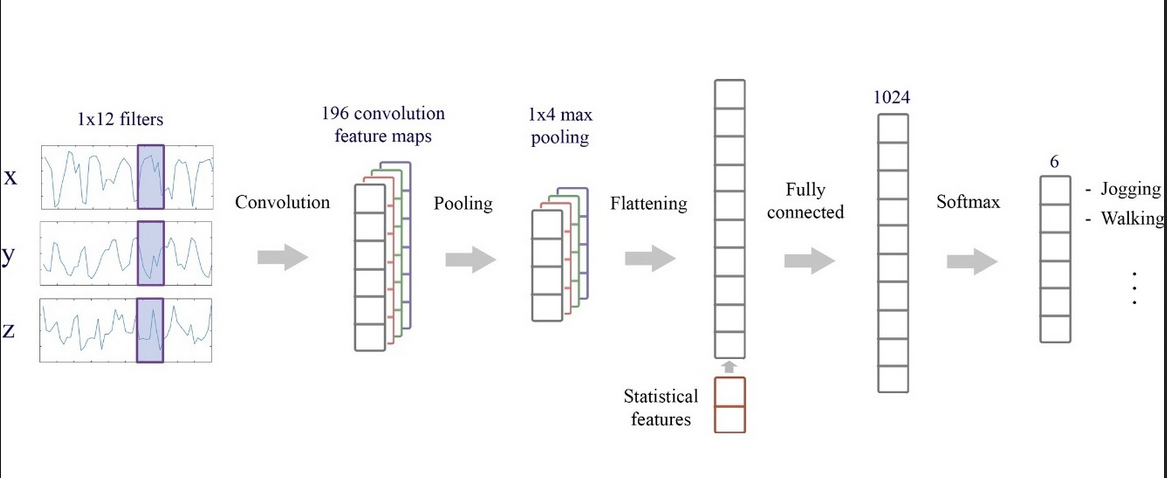

In [54]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, Flatten, Bidirectional, InputLayer, Conv2D, MaxPool2D, Masking
from tensorflow.keras.models import Sequential, Model
from keras.callbacks import EarlyStopping


cb = EarlyStopping(monitor='val_loss',patience=5, min_delta=0.01, restore_best_weights=True, verbose=2)

def cnn_model(T, D, nb_classes):
  model = Sequential([
      InputLayer(input_shape = (T, D, 1)),
      Conv2D(filters=196, kernel_size= (12, 1), strides=1, padding='same', activation='relu'),
      MaxPool2D(pool_size=(1, 4), strides=1, padding='same'),
      Flatten(),
      Dense(units=nb_classes, activation='softmax')
  ])
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=["accuracy"])
  model.summary()
  return model

In [55]:
model_cnn = cnn_model(600, 3, 5)
history_cnn = model_cnn.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=256, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 600, 3, 196)       2548      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 600, 3, 196)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 352800)            0         
                                                                 
 dense_5 (Dense)             (None, 5)                 1764005   
                                                                 
Total params: 1766553 (6.74 MB)
Trainable params: 1766553 (6.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
58/58 [==============================] - 172s 3s/step - loss: 1.3058 - 

LTSM avancée

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

def lstm_avance(T, D, nb_classes):
  model = Sequential()
  model.add(LSTM(units = 128, input_shape = (T, D)))
      # Dropout layer
  model.add(Dropout(0.5))
# Dense layer with ReLu
  model.add(Dense(units = 64, activation='relu'))
# Softmax layer
  model.add(Dense(nb_classes, activation = 'softmax'))
# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
lstm_avance = lstm_avance(500, 3, 5)
history_cnn = lstm_avance.fit(data_obs_train_Norm_pad, labels_train_onehot, epochs=10, batch_size=500, validation_data=(data_obs_test_Norm_pad, labels_test_onehot),  callbacks=[cb])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 128)               67584     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 5)                 325       
                                                                 
Total params: 76165 (297.52 KB)
Trainable params: 76165 (297.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
19/19 [==============================] - 69s 3s/step - loss: 1.4645 - accuracy: 0.3558 - val_loss: 1.2822 - val_accuracy: 0.4595
Epoch 2/

## Graphique de comparaison

In [ ]:
# Visualiser l'évolution de la perte et de la précision au fil des époques
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['val_loss'], label='RNN simple')
plt.plot(history_rnn_avance.history['val_loss'], label='RNN avancé')
plt.plot(history_lstm.history['val_loss'], label='LSTM')
plt.plot(history_lstm_bidi.history['val_loss'], label='LSTM Bidirectionnal')
plt.title('Validation Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['val_accuracy'], label='RNN simple')
plt.plot(history_rnn_avance.history['val_accuracy'], label='RNN avancé')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM')
plt.plot(history_lstm_bidi.history['val_accuracy'], label='LSTM Bidirectionnal')
plt.title('Validation Accuracy')
plt.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

36/36 [==============================] - 5s 124ms/step


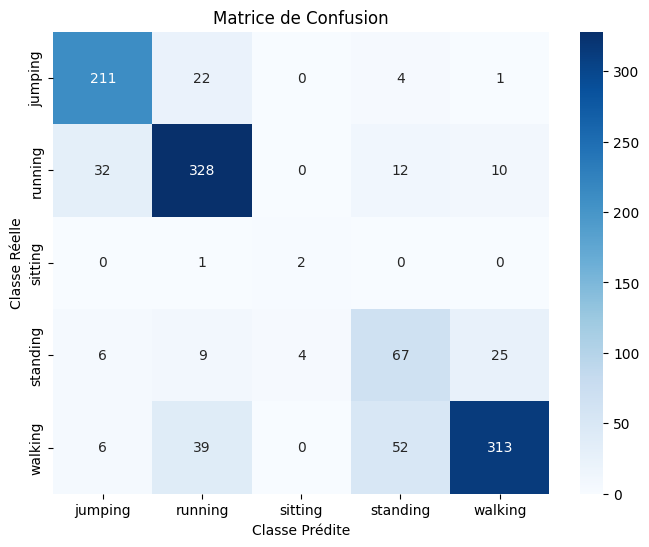

Précision globale : 80.51%


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ...

# Après l'entraînement du modèle
y_pred = model_cnn.predict(data_obs_test_Norm_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(labels_test_onehot, axis=1)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)

class_names = np.unique(data_labels)


# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()

# Calcul et affichage de la précision globale
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Précision globale : {accuracy * 100:.2f}%")